DataFrane include 11 columns:
Name - The games name
Platform - Platform of the games release (i.e. PC,PS4, etc.)
Year - Year of the game's release
Genre - Genre of the game
Publisher - Publisher of the game
NA_Sales - Sales in North America (in millions)
EU_Sales - Sales in Europe (in millions)
JP_Sales - Sales in Japan (in millions)
Other_Sales - Sales in the rest of the world (in millions)
Global_Sales - Total worldwide sales.

I assume sales were calculated only during the released year. In other words, sales is not up to date.

I`m going to do exploratory video game sales analysis. My analysis method is from top to bottom.
Firstly, I import all needed liblieries and identified empty rows. As a result, I deleted 329 rows, therefore not to spoiled exsisted data. 
Next step, I highleted most sales attrective continebt in game sales, as well as popular genre, publishers and platform in all game sales volume.
The second step, I found out the top 100 games and continiesly detailed sales across continent, genre, publishers and platform.


Data preparation

In [ ]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Layout, Figure, Data, Stream, YAxis, Marker
import plotly.express as px
# Display all rows
pd.options.mode.chained_assignment = None

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

# Dispay all columns in a line
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

In [ ]:
# Read data
vg=pd.read_csv('vgsales.csv')

In [ ]:
# Cheak dataframe
# vg.isnull().sum().sort_values(ascending=False) #other option
check_empty=vg.isna().sum().sort_values(ascending=False)
print(f'Total empty rows over video game sales are {sum(vg.isna().sum().sort_values(ascending=False))}')

# Print cheking of the rows
check_empty

Total empty rows over video game sales are 329


Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Delete rows with null values
vg.dropna(subset=['Year'], inplace=True)
vg.dropna(subset=['Publisher'], inplace=True)

In [ ]:
# # Recheak dataframe
# print('Column "Year" is {}'.format(vg['Year'].dtype))
# print('Column "Publisher" is {}'.format(vg['Publisher'].dtype))

# # Fill missing data by mode
# vg['Year']=vg['Year'].fillna(vg['Year'].mean())
# vg['Publisher']=vg['Publisher'].fillna(vg.Publisher.mode()[0])
check_empty=vg.isna().sum().sort_values(ascending=False)
check_empty

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Hihtlevel analysis

In [ ]:
## Total Sales in the World

# Data preparation
sales_over_years=vg.groupby(by='Year').sum().iloc[:, 1:-1].reset_index()

line_sales_NA=go.Scatter(y=sales_over_years['NA_Sales'], x=sales_over_years['Year'], name='North America')
line_sales_EU=go.Scatter(y=sales_over_years['EU_Sales'], x=sales_over_years['Year'], name='Europe')
bline_sales_JP=go.Scatter(y=sales_over_years['JP_Sales'], x=sales_over_years['Year'], name='Japan')
line_sales_Other=go.Scatter(y=sales_over_years['Other_Sales'], x=sales_over_years['Year'], name='Other')

# Mix together lines 
lines_continets=[line_sales_NA, line_sales_EU, bline_sales_JP, line_sales_Other]

# Create layout
layout=dict(title='Total Sales in the World', 
           title_font_size=24,
            title_x=0.5,
            xaxis= dict(title='Year'), 
            yaxis= dict(title='Total Sales, Millions USD'),
            # Set whole legend
            legend=dict(
                font=dict(
                    size=13)),
            # Set legend tile
            legend_title=dict(
                font=dict(
                        size=16),
                text='Continent'),
             hovermode='x'
                )

# Link data and layout
fig=dict(data=lines_continets, 
        layout=layout)

iplot(fig)

As we can observe, the most attractive continent for sales is North America. Europe in recent years increased and equalized its sales with North America.

In [ ]:
# Top Publishers Over Total Games
h=sum(vg['Global_Sales'])

# Data preparation
top_n_publ=10
publishers=vg.groupby(['Publisher'], as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False).reset_index(drop=True)

# Create data to store top-n and other publishers
publishers_top_other=publishers.head(10)
if len(publishers) > 10:
    publishers_top_other.loc[len(publishers_top_other.index)] = ['Other', sum(publishers['Global_Sales'][10:])]

# Set color
clr_publishers=['grey' if col=='Other' else 'blue' for col in publishers_top_other['Publisher'].values]

# Create line
line_publishers=px.bar(
    # Label bars
    text=[f'{i/h:.2%}' for i in publishers_top_other['Global_Sales']],
    data_frame=publishers_top_other,
    y='Publisher',
    x='Global_Sales',
    color='Publisher',
    orientation='h',
    labels={
        'Global_Sales':'Game Sales, Million USD'
    },
    title=(f'Top {top_n_publ} Publishers Over Total Games'),
    color_discrete_sequence=clr_publishers
    )

line_publishers.update_layout(
    title_x=0.5,
    legend_title = dict(font = dict(
        size = 17))
    )

line_publishers.update_traces(
    showlegend=False
)

iplot(line_publishers)

At the graph above, we can see the top 10 publishers acumulate almost 70% of game sales volume.

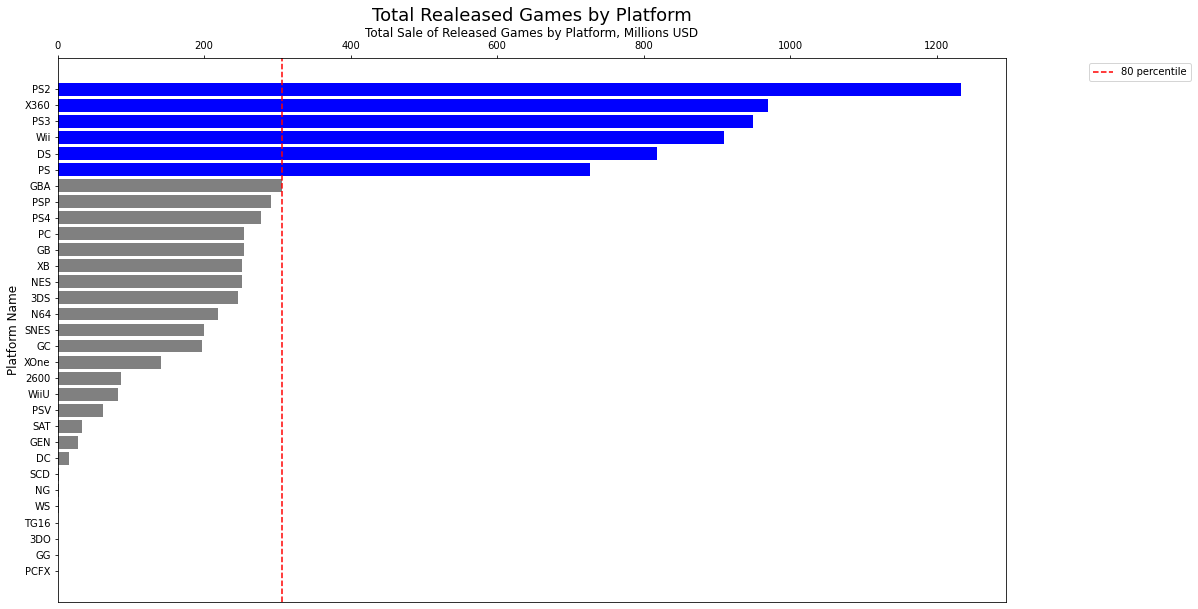

In [ ]:
## Total Realesed Games by Platform

# Set format
fig, ax = plt.subplots(figsize=(17, 10))

# Data preparation
platforms=vg.groupby(['Platform'])[['Global_Sales']].sum().sort_values(['Global_Sales'], ascending=False).reset_index()

# Identify and create percentile for platform
percentile=80
percentile_line=np.percentile(platforms['Global_Sales'].values, percentile)

# Set percentile line
plt.axvline(x=percentile_line, color='red', linestyle='--', label=(f'{percentile} percentile'))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

# Set different color for percentile value
clrs_platf_above_min='blue'
clrs_platf_below_min='grey'
clrs_platform_rule = [clrs_platf_above_min if value > percentile_line else clrs_platf_below_min for value in platforms['Global_Sales'].values]

# Create bar
bar_platform=plt.barh(y=platforms["Platform"], width=platforms['Global_Sales'], color=clrs_platform_rule)
ax.invert_yaxis()

# # Move x tick to top
ax.axes.xaxis.set_ticks_position("top")

# # Move x label to top
ax.xaxis.set_label_position('top')

# Name title
plt.title(f'Total Realeased Games by Platform', fontsize=18)

# Name axises
plt.xlabel('Total Sale of Released Games by Platform, Millions USD', fontsize=12)
plt.ylabel('Platform Name', fontsize=12)

plt.show()

The most popular platforms are PS2, X360, PS3, Wii, DS, and Ps. The platforms gain 80% of sales from the whole market.


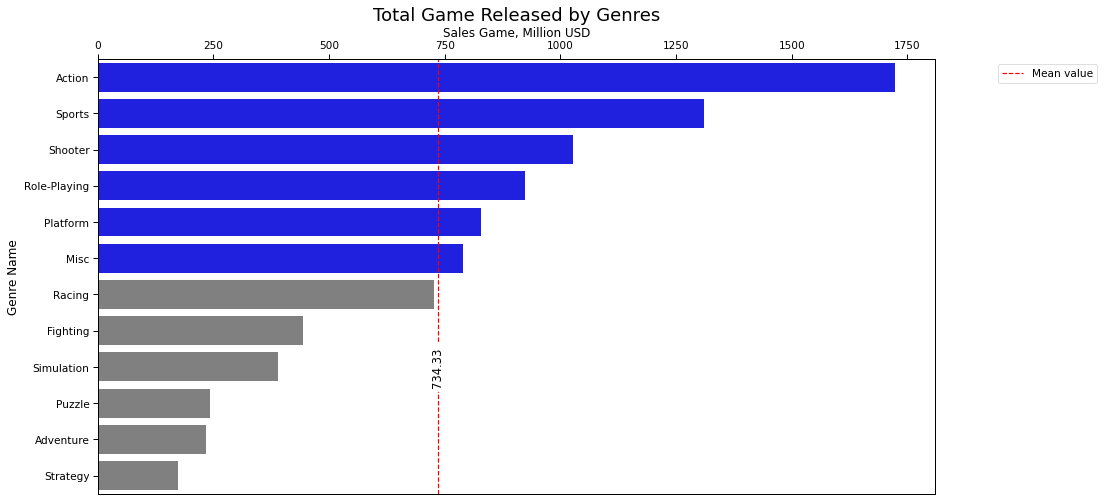

In [ ]:
## Total Game Released by Genres

# Group table by Genre with sorting count numbers 
genres=vg.groupby(['Genre'], as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False).reset_index(drop=True)

# Set format
sns.set_context('paper', font_scale=1.2)
plt.figure(figsize=(15,8))

# Create mean line for genre
plt.axvline(x=genres.Global_Sales.mean(), color='red', linestyle='--', label='Mean value')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

# Set different color for genre above mean
clrs_genre_above_mean='blue'
clrs_genre_below_mean='grey'
clrs_genre_fig1 = [clrs_genre_above_mean if genres['Global_Sales'].mean() < value else clrs_genre_below_mean for genre, value in genres[['Genre', 'Global_Sales']].values]

# Name mean line
plt.text(genres['Global_Sales'].mean(), len(genres['Genre'].unique()) // 1.5, round(genres['Global_Sales'].mean(),2), ha='center', va='center',rotation='vertical', backgroundcolor='white')

# Create bar
bar_genre=sns.barplot(data=genres, orient='h', x='Global_Sales', y='Genre', palette=clrs_genre_fig1)

# Move x tick to top
bar_genre.axes.xaxis.set_ticks_position("top")

# Move x label to top
bar_genre.xaxis.set_label_position('top')

# Set title
plt.title('Total Game Released by Genres', fontsize=18)

# Set names of axis
plt.ylabel('Genre Name', fontsize=12)
plt.xlabel('Sales Game, Million USD', fontsize=12)

plt.show()

As shown above, the most popular genres are action, sports, shooter, role-playing, platform, and misc. These genres are above the sales mean of nearly 735 mln USD.

Detailed analysis (top 100 analysis)

In [ ]:
# Top 100 game sales analysis
top_100_games=vg.head(100)

top_100_sales=go.Figure()
top_100_sales.add_traces(
    go.Scatter(x=top_100_games.Rank, 
              y=top_100_games.NA_Sales,
              name='North America',
              mode='markers', 
              marker_color='orange',
              text=top_100_games.Name)
              )

top_100_sales.add_traces(
    go.Scatter(x=top_100_games.Rank, 
              y=top_100_games.JP_Sales,
              name='Japan',
              mode='markers', 
              marker_color='green',
              text=top_100_games.Name)
              )

top_100_sales.add_traces(
    go.Scatter(x=top_100_games.Rank, 
              y=top_100_games.EU_Sales,
              name='Europe',
              mode='markers', 
              marker_color='red',
              text=top_100_games.Name)
              )

top_100_sales.add_traces(
    go.Scatter(x=top_100_games.Rank, 
              y=top_100_games.Other_Sales,
              name='Other',
              mode='markers', 
              marker_color='blue',
              text=top_100_games.Name)
              )
top_100_sales.update_layout(
    # Set title
    title='Sales of Top 100 Games in North America, Europe, Japan and Other Countries',
    title_font_size=25,
    # Allocate title to centre
    title_x=0.5,
    # Set x-parametrs
    xaxis=dict(
        zeroline=False,
        zerolinewidth=1,
        showgrid=False,
        showticklabels=True,
        title='Rank', 
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        
    ),
    # Set y-parametrs
    yaxis=dict(
        zeroline=False,
        zerolinewidth=1,
        showgrid=True,
        gridcolor='white',
        gridwidth=1,
        title='Game Sales, Million USD',
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside'
    ),
    # Set back ground color
    plot_bgcolor='rgb(243, 243, 243)',
    # Set legend
   legend = dict(font = dict(
                    size = 12, 
                    color = "black")
                    ),
   legend_title = dict(font = dict(
                    size = 15, 
                    color = "black"), 
                text='Continent'),
    # Label per rank
    hovermode="x"
)

iplot(top_100_sales)

Most high game selling volume is observed in North America, and the second place is Europe. We can notice the trend is the same as the high-level analyse. 

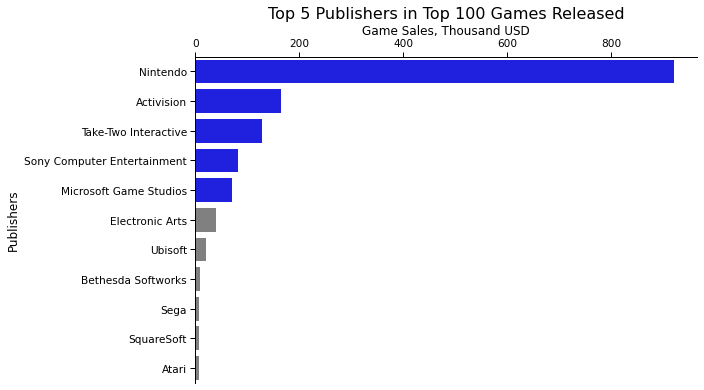

In [ ]:
# Top Publishers in Top 100 Games Released

# Data preparation
top_100_publisher=top_100_games.groupby(by=['Publisher']).sum().sort_values('Global_Sales', ascending=False).iloc[:, -1].reset_index()

# Set format
sns.set_context('paper', font_scale=1.2)
plt.figure(figsize=(9, 6))

# Identify a top n piblishers
top_n_publ=5
pop_pub_name=top_100_publisher['Publisher'].head(top_n_publ).values

# Set different color for top n. Dataframe need to be sorted by descending
clrs_top_publishers='blue'
clrs_other_publishers='grey'
clrs = [clrs_top_publishers if value in top_100_publisher['Publisher'].head(top_n_publ).values else clrs_other_publishers for value in top_100_publisher['Publisher'].values]

# Create bar
hist_top_100_games_publisher=sns.barplot(data=top_100_publisher, y='Publisher', x='Global_Sales', orient='h', palette=clrs)

# Move x tick to top
hist_top_100_games_publisher.axes.xaxis.set_ticks_position("top")

# Move x label to top
hist_top_100_games_publisher.xaxis.set_label_position('top')

# Create Title
plt.title(f'Top {top_n_publ} Publishers in Top 100 Games Released', size=16)

# Rename axis
plt.xlabel('Game Sales, Thousand USD', size=12)
plt.ylabel('Publishers', size=12)

# Set borders
hist_top_100_games_publisher.spines[['right', 'bottom']].set_visible(False)

plt.show()


The top 5 publishers, Nintendo, Activision, Take-Two Interactive, Sony Computer Entertainment and Microsoft Game Studio, in the top 100 released games account for 94% of game sales. 

In [ ]:
# Top Publishers Dynamics Over Years

# Data preparation
top_publ_dynamics=vg.groupby(by=['Year','Publisher']).sum().sort_values('Year').iloc[:, :1].reset_index()

# Create line
line_publ_dynamics=px.line(
    # dataframe with top publishers 
    top_publ_dynamics[top_publ_dynamics['Publisher'].isin(pop_pub_name)], 
    x='Year', 
    y='Rank',
    color='Publisher'
    )

line_publ_dynamics.update_layout(
    # Add title
    title=f'Top {top_n_publ} Publishers Dynamics Over Years',
    title_font_size=25,
    # Move title to centre
    title_x=0.5,
    # Label per rank
    hovermode='x')

# Label x and y axises
line_publ_dynamics.update_xaxes(title_font_size=16)
line_publ_dynamics.update_yaxes(title_font_size=16, title='Game Sales, USD')

iplot(line_publ_dynamics)

As we can observe, the pioneer and leader is Activision. The nearest is Sony Computer Entertainment.

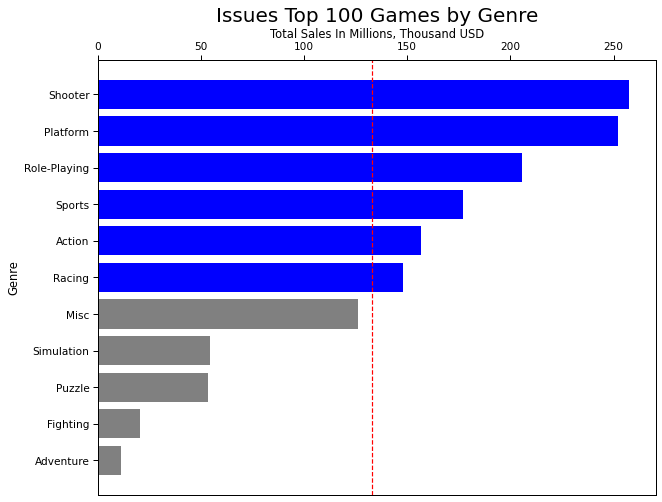

In [ ]:
# Top 100 games by genre

# Data preparation
top_100_genres=top_100_games.groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False).reset_index()

# Set format
fig, ax = plt.subplots(figsize=(10, 8))

# Create mean line for genre
plt.axvline(x=top_100_genres.Global_Sales.mean(), color='red', linestyle='--') 

# Set different color for genre above mean
clrs_top_genre='blue'
clrs_other_genre='grey'
clrs_genre_fig = [clrs_top_genre if top_100_genres['Global_Sales'].mean() < value else clrs_other_genre for genre, value in top_100_genres[['Genre', 'Global_Sales']].values]
pop_top_100_genre = [genre for genre, value in top_100_genres[['Genre', 'Global_Sales']].values if top_100_genres['Global_Sales'].mean() < value ]

# Create bar
bar_popul_genre=plt.barh(width=top_100_genres.Global_Sales, y=top_100_genres.Genre, color=clrs_genre_fig)
ax.invert_yaxis()

# Create title
ax.set_title('Issues Top 100 Games by Genre', size=20)

# Set axises
ax.set_ylabel('Genre')
ax.set_xlabel('Total Sales In Millions, Thousand USD')

# Move tick to top
ax.xaxis.tick_top()

# Move x label to top
ax.xaxis.set_label_position('top')

In [ ]:
# Top Genre Dynamics Over Years

# Data preparation
top_genre_dynamics=vg.groupby(by=['Year','Genre']).sum().sort_values('Year').iloc[:, :1].reset_index()

# Create line
line_genre_dynamics=px.line(
    # dataframe with top publishers 
    top_genre_dynamics[top_genre_dynamics['Genre'].isin(pop_top_100_genre)], 
    x='Year', 
    y='Rank',
    color='Genre'
    )

line_genre_dynamics.update_layout(
    # Add title
    title=f'Top {len(pop_top_100_genre)} Genre Dynamics Over Years',
    title_font_size=25,
    # Move title to centre
    title_x=0.5,
    # Label per rank
    hovermode='x')

# Label x and y axises
line_genre_dynamics.update_xaxes(title_font_size=16)
line_genre_dynamics.update_yaxes(title_font_size=16, title='Game Sales, USD')

iplot(line_genre_dynamics)


The action movie has been the most popular genre for many years.